# Filtro Gaussiano: implementação e discussões

## Introdução

O filtro Gaussiano também é um filtro passa-baixa, atenua transições e promove borramentos. Sua implementação dar-se a partir da convulução da imagem com umas máscara gaussiana tri-dimensional, gerada pro meio da seguinte fórmula:

$$w(x,y) = \frac{1}{2\pi\sigma^2}e^{-\frac{x^2+y^2}{2\sigma^2}}$$

## Implementação (Código fonte)

Importação dos pacotes utilizados para simulação:

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math as m
import navFunc as nf
from navFunc.cls import cls
from IPython.display import Image

Carregar imagem utilizando a função do OpenCV:

In [3]:
img = cv2.imread('lena.png',cv2.IMREAD_GRAYSCALE)

### Definições preliminares:
- Definir tamanho do kernel utilizado
- Definir número de aplicações do filtro

In [4]:
# Cria variavel do tipo struct (similar ao matlab):

Filter = nf.structtype()                

Filter.img = np.array(img)

Filter.imgSize = nf.structtype()
Filter.imgSize.lin, Filter.imgSize.col = Filter.img.shape

#################### Filtro da Gaussiano
# Kernel def:

Filter.kernelSize = 3

# Número de aplicações do filtro
numAp = 1;

# Variável auxiliar para guardar a saída
U = np.zeros((numAp, Filter.imgSize.lin, Filter.imgSize.col))

### Aplicação efetida do método:

In [5]:
#############################################################################################
########### Method apllication:

for k in range(0, numAp):
    if k == 0:
        U[k,:,:] = nf.filterGaussian(Filter)
        print(U[k, :, :])
    else:
        Filter.img = U[k-1,:,:]
        U[k, :, :] = nf.filterGaussian(Filter)
        print(U[k,:,:])



################################
Process finished
Filter have been applied
################################
[[  35.   51.   50. ...,   29.   30.   21.]
 [  51.   76.   74. ...,   43.   45.   30.]
 [  51.   76.   75. ...,   44.   46.   31.]
 ..., 
 [ 156.  232.  232. ...,  103.  107.   73.]
 [ 154.  229.  230. ...,  103.  106.   72.]
 [ 102.  151.  152. ...,   68.   69.   47.]]


### Exibir resultados:

- Imagem original:

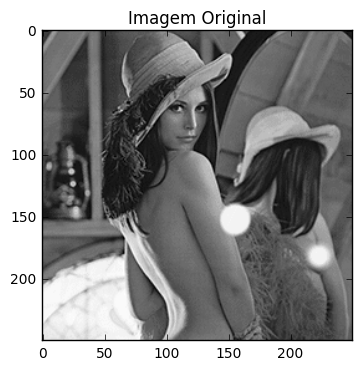

In [6]:
######### Using matplotlib #################
plt.figure(1)
plt.imshow(img, 'gray')
plt.title('Imagem Original')
plt.show()

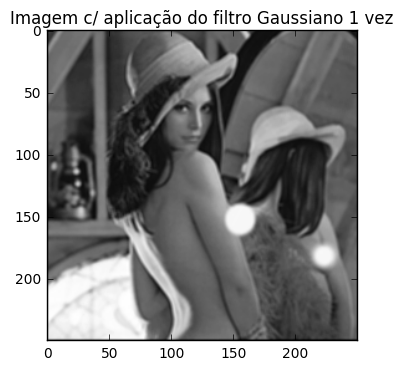

In [7]:
plt.figure(2)
plt.imshow(U[(numAp - 1),:,:], 'gray')
plt.title('Imagem c/ aplicação do filtro Gaussiano %d vez' %numAp)
plt.show()

#### Apêndice 01 - Função para cálculo do filtro gaussiano:

In [8]:
def filterGaussian (Filter):
    ### Imports
    import numpy as np
    import matplotlib.pyplot as plt
    import math as m
    import navFunc as nf

    # Load image into numpy matrix

    A = Filter.img

    size = nf.structtype()
    size.A = nf.structtype()
    size.A.lin, size.A.col = A.shape

    #################### Gaussian filter
    ## Pre-set steps:
    ### Generate two kernersl (horizontal and vertical)
    #
    Filter.kernel = gaussianKernel(Filter.kernelSize, Filter.kernelSize)
    #################
    central = m.floor((Filter.kernelSize / 2))

    C = np.zeros((size.A.lin + central * 2, size.A.col + central * 2))
    C[(0 + central):(size.A.lin + central), (0 + central):(size.A.col + central)] = A

    #################
    ##  Run the kernel over the matrix (similar to convolution):
    #################
    soma = 0
    D = np.zeros(A.shape)

    for j in range((0), size.A.lin):
        for k in range((0), size.A.col):
            # Run kernel in one matrix's elements
            for kl in range(0, Filter.kernelSize):
                for kk in range(0, Filter.kernelSize):

                    soma = (C[j + kl, k + kk] * Filter.kernel[kl, kk]) + soma

            value = m.ceil((soma))
            soma = 0
            D[j, k] = value

    D = np.uint8(D)

    print('################################')
    print('Process finished')
    print('Filter have been applied')
    print('################################')

    return D

def gaussianKernel(h1, h2):

    import numpy as np
    import matplotlib.pyplot as plt
    import math as m
    import navFunc as nf

    ## Returns a normalized 2D gauss kernel array for convolutions

    x, y = np.mgrid[0:h2, 0:h1]
    x = x-h2/2
    y = y-h1/2
    sigma = 1.5
    g = np.exp( -( x**2 + y**2 ) / (2*sigma**2) )
    return g / g.sum()


# Discussões sobre o método

Assim como o filtro da Media o filtro Gaussiano é do tipo passa-baixa e provoca borramentos na imagem, porém enquanto o filtro da média pondera igualmente os pixels vizinhos a operação Gaussiana não. O kernel deste filtro é baseado na distrbuição normal da função densidade de probabilidade, cujo elemento central representa o valor máximo da gaussina e caem de acordo com a função até atingir valores zeros no infinito. A figura a seguir ilustra o descrito.

Distribuição Gaussiana 3-D em torno do centro do Kernel:


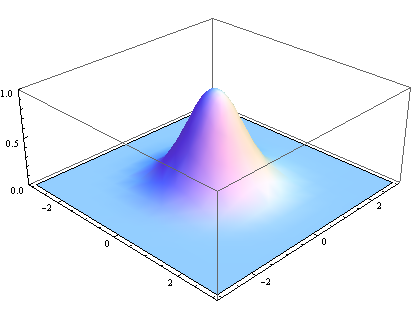

In [9]:
print("Distribuição Gaussiana 3-D em torno do centro do Kernel:")
Image(filename='Gaussian.png')

In [10]:
print("Exemplo de Kernel gaussiano 5x5 - valor central máximo")
print((gaussianKernel(5,5)))

Exemplo de Kernel gaussiano 5x5 - valor central máximo
[[ 0.00552604  0.01344169  0.02096397  0.02096397  0.01344169]
 [ 0.01344169  0.0326959   0.0509933   0.0509933   0.0326959 ]
 [ 0.02096397  0.0509933   0.07953034  0.07953034  0.0509933 ]
 [ 0.02096397  0.0509933   0.07953034  0.07953034  0.0509933 ]
 [ 0.01344169  0.0326959   0.0509933   0.0509933   0.0326959 ]]


Tal ponderação provê a este filtro a capacidade de tornar os elementos centrais do pixel mais próximos da média e os mais adjacentes mais distantes da média. O efeito visual é similar ao borramento de "dentro para fora" da máscara.

## Quanto ao tamanho do kernel:

Submentendo uma imagem a uma variação do tamanho kernel constata-se o seguinte: máscaras de tamanhos menores, como 3x3, impactam bastante em uma imagem complexa, tornanda pouco visível, pois máscaras menores realçam regiões contidas em si. Enquanto que máscaras maiores os contornos principais da imagem, resultando em uma possível identificação e relação com a imagem original.

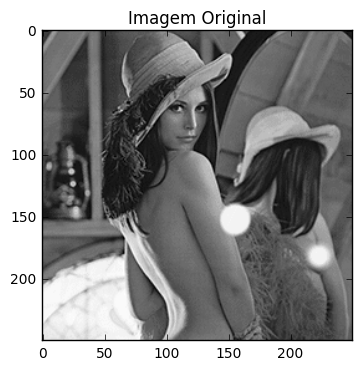

In [11]:
plt.figure(1)
plt.imshow(img, 'gray')
plt.title('Imagem Original')
plt.show()

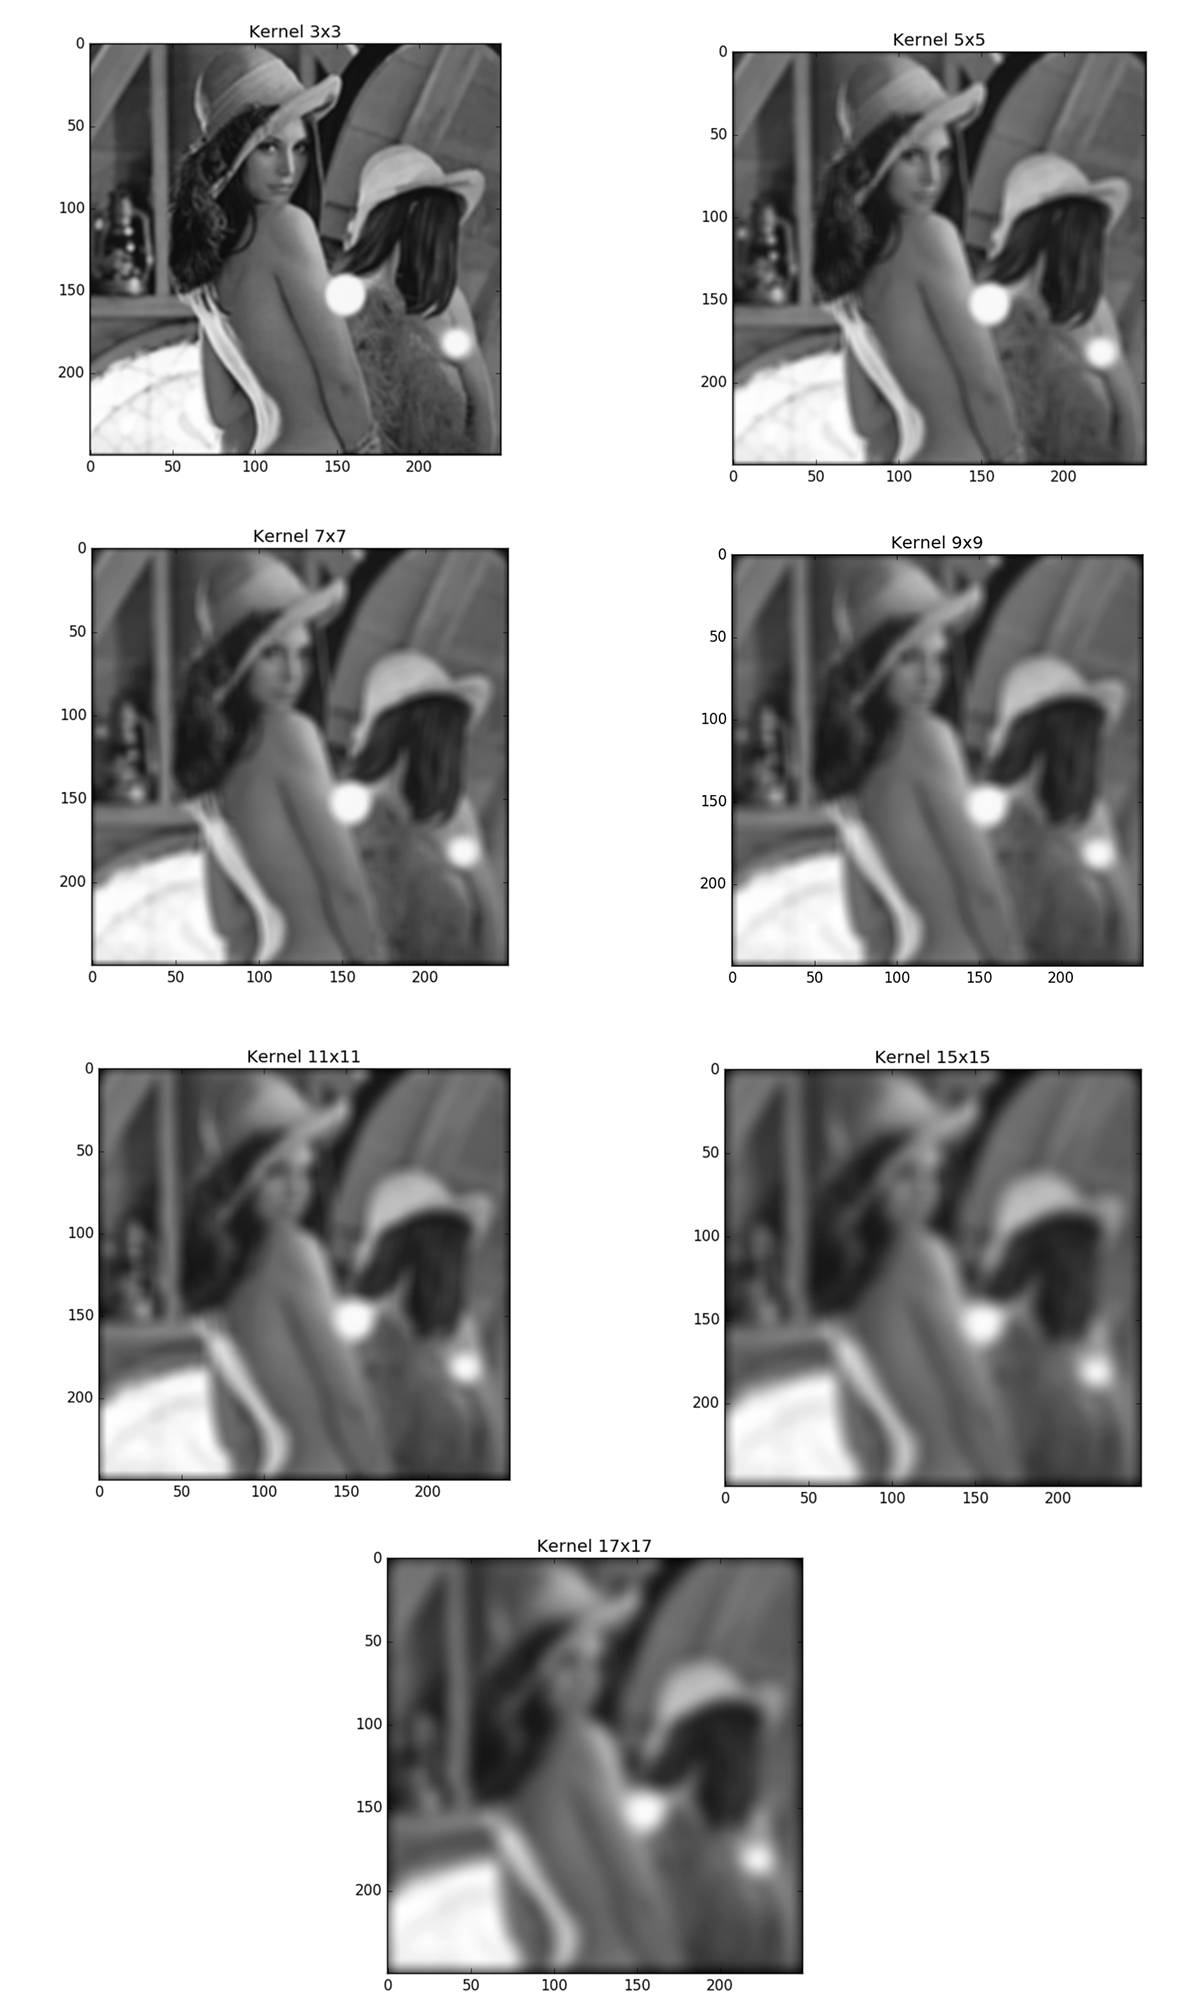

In [16]:
Image(filename='02.png')

## Quanto a aplicações sucessivas do filtro:

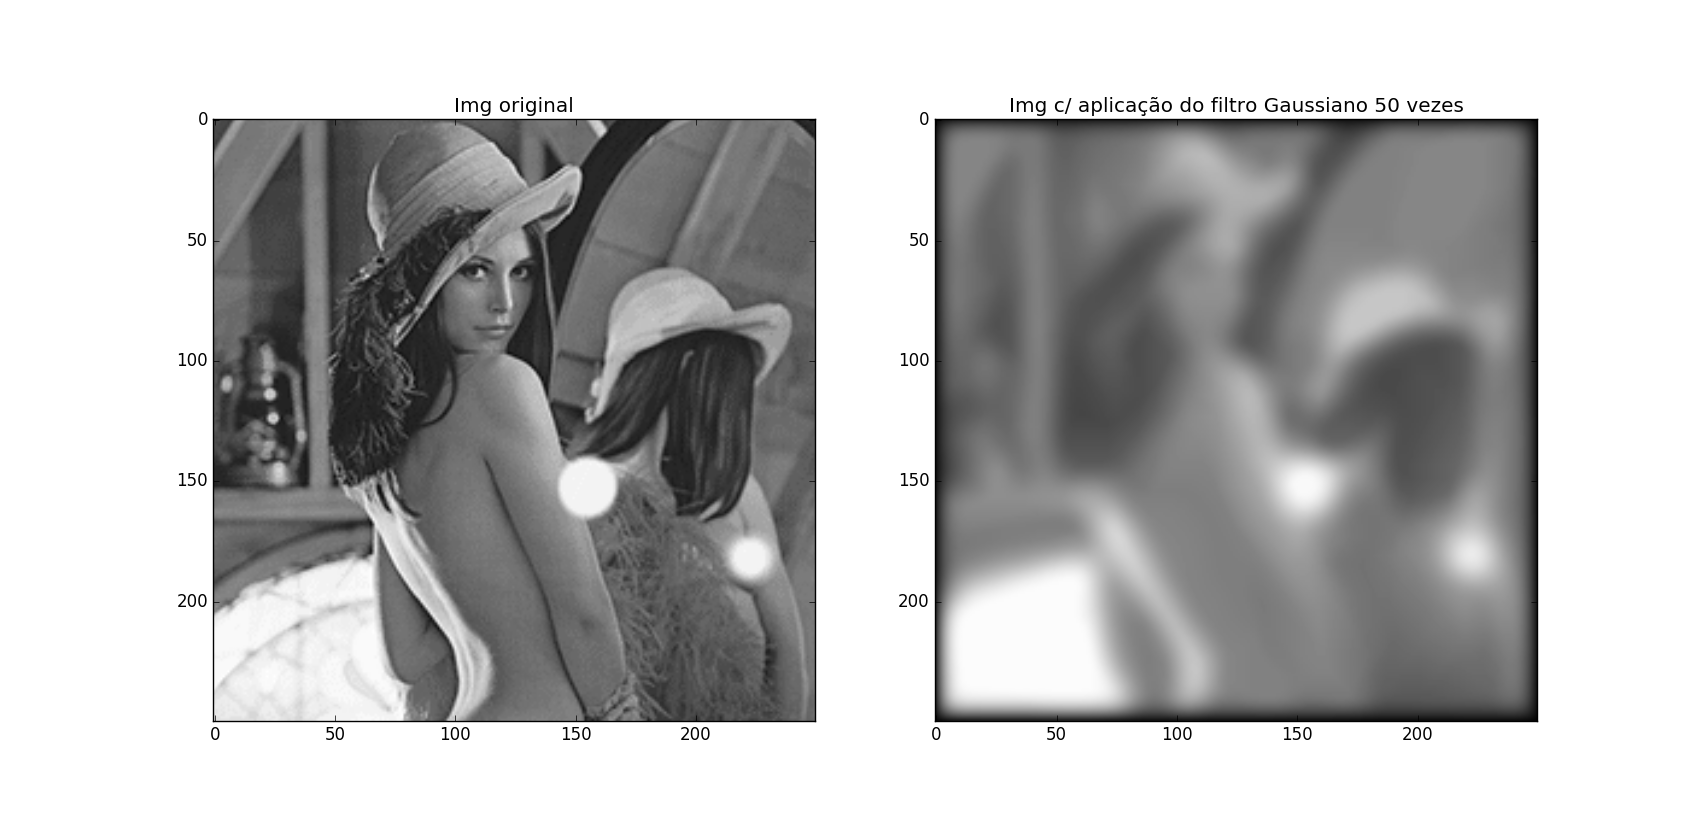

In [17]:
Image(filename='lena01.png')

## Evidências durante aplicações

Há um parâmetro na Gaussiana que pode ser ajustado para configuração do Kernel, este é o desvião padrão ($ \sigma $), também conhecido como abertura da curva.

Imagem submetida a um filtro Gaussiano de Kernel 5x5 com sigma = 1.0


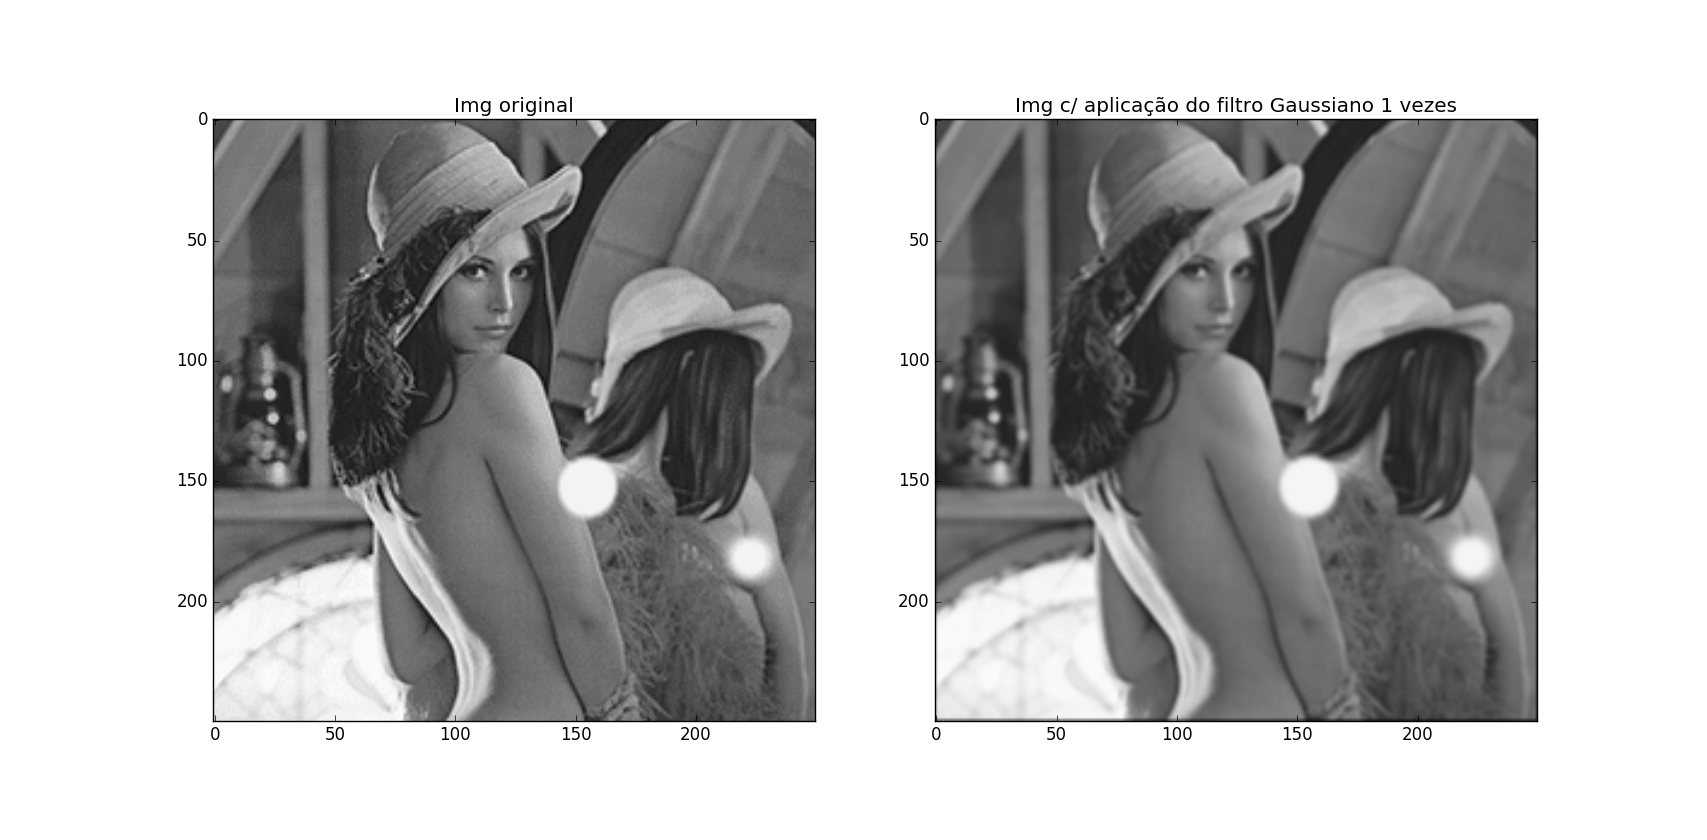

In [18]:
print('Imagem submetida a um filtro Gaussiano de Kernel 5x5 com sigma = 1.0')
Image(filename='lena-sig1.png')

Imagem submetida a um filtro Gaussiano de Kernel 5x5 com sigma = 1.5


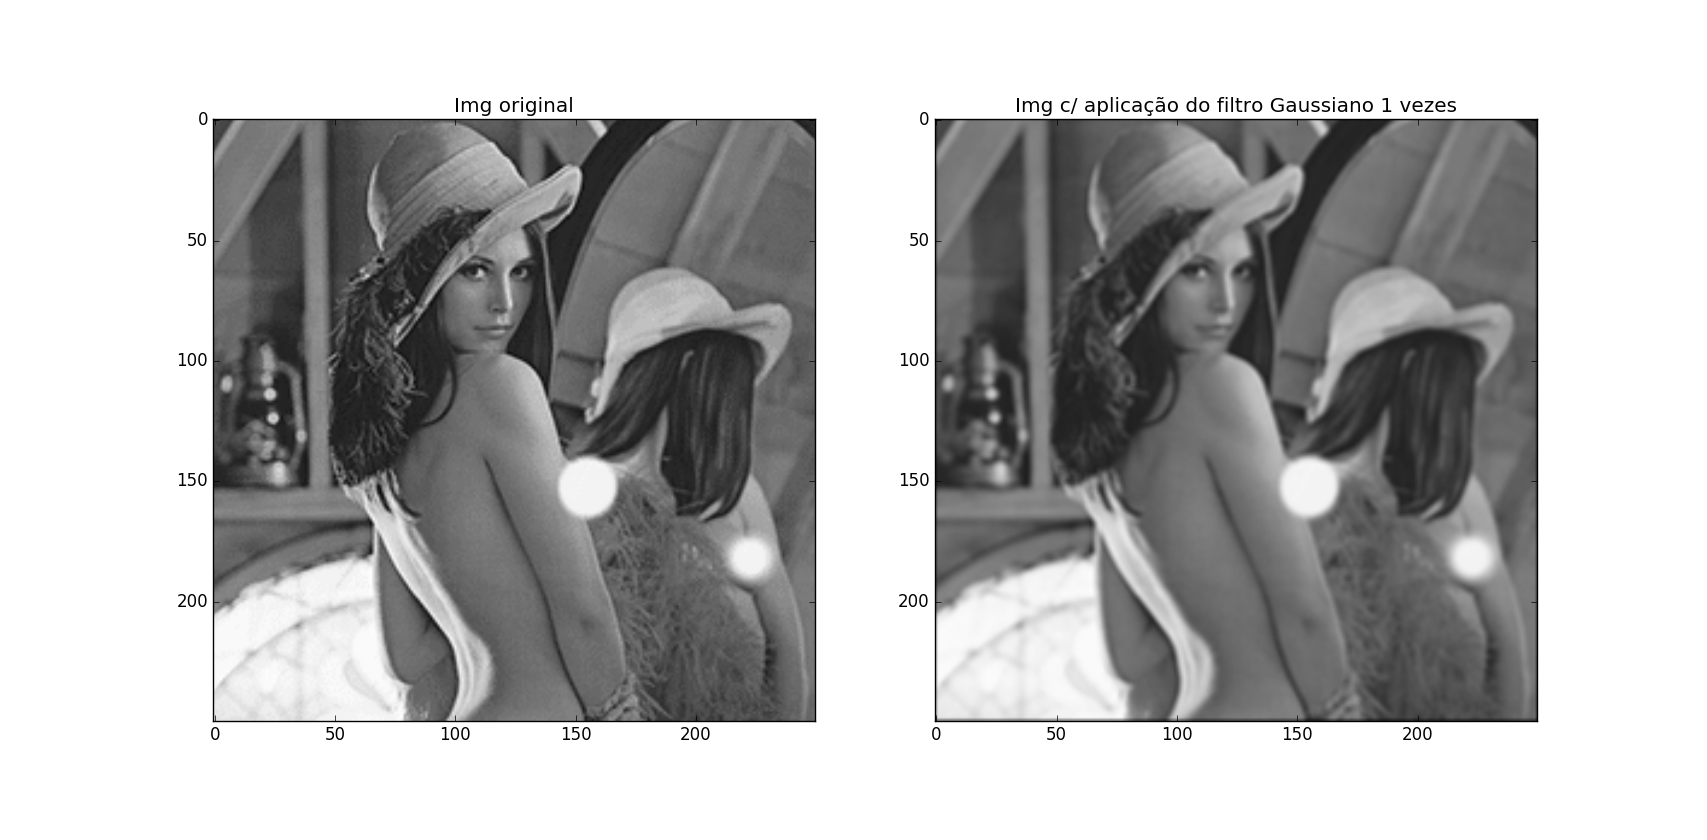

In [19]:
print('Imagem submetida a um filtro Gaussiano de Kernel 5x5 com sigma = 1.5')
Image(filename='lena-sig15.png')

Imagem submetida a um filtro Gaussiano de Kernel 5x5 com sigma = 2.0


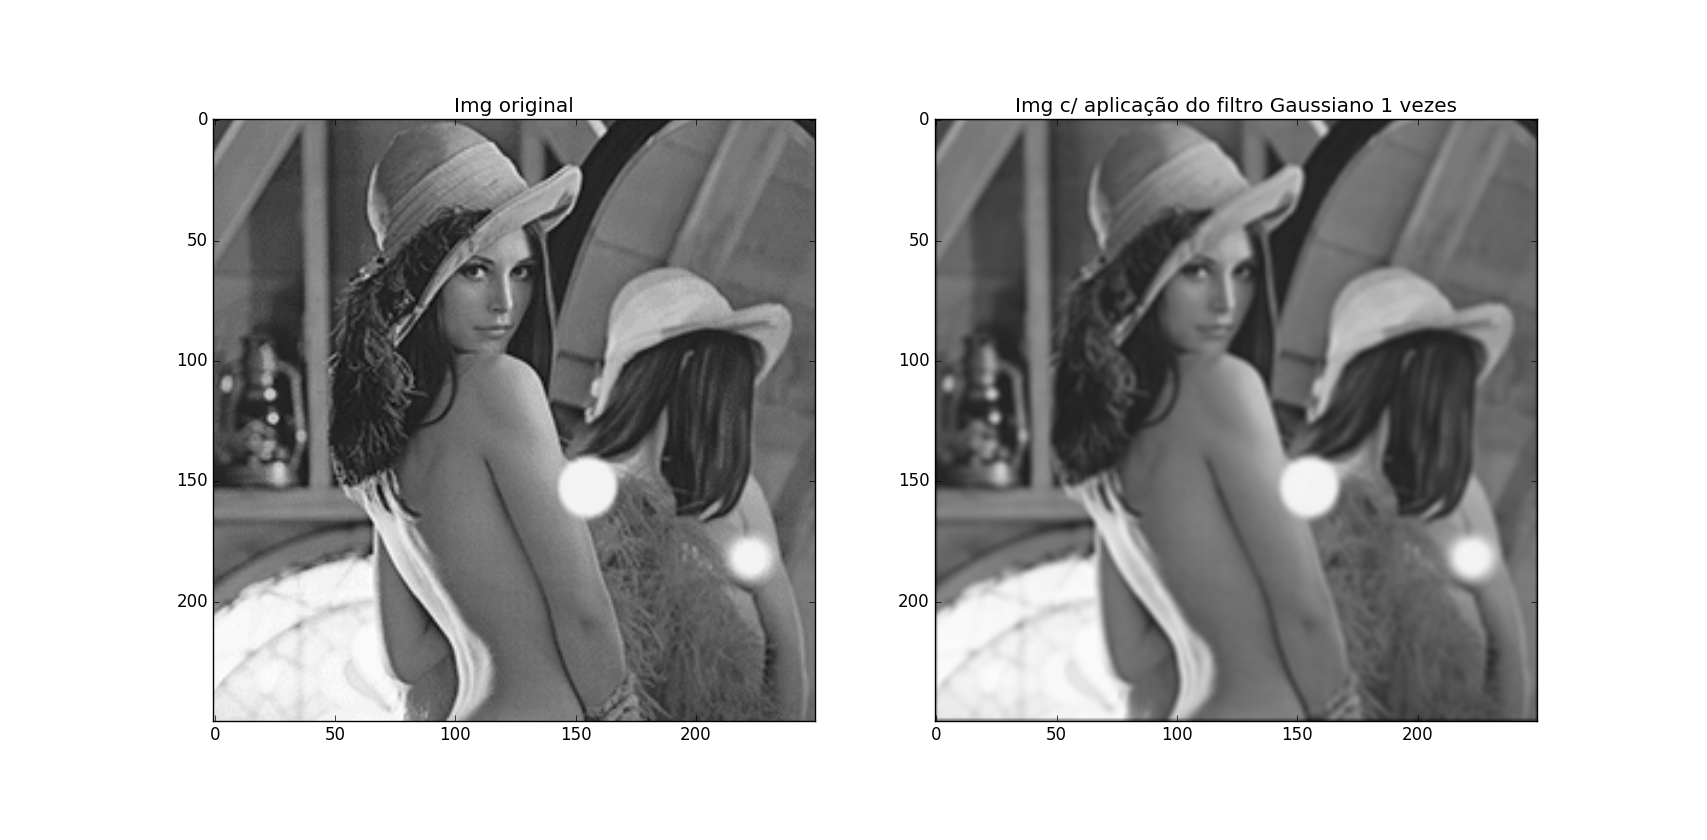

In [20]:
print('Imagem submetida a um filtro Gaussiano de Kernel 5x5 com sigma = 2.0')
Image(filename='lena-sig20.png')

Imagem submetida a um filtro Gaussiano de Kernel 5x5 com sigma = 3.0


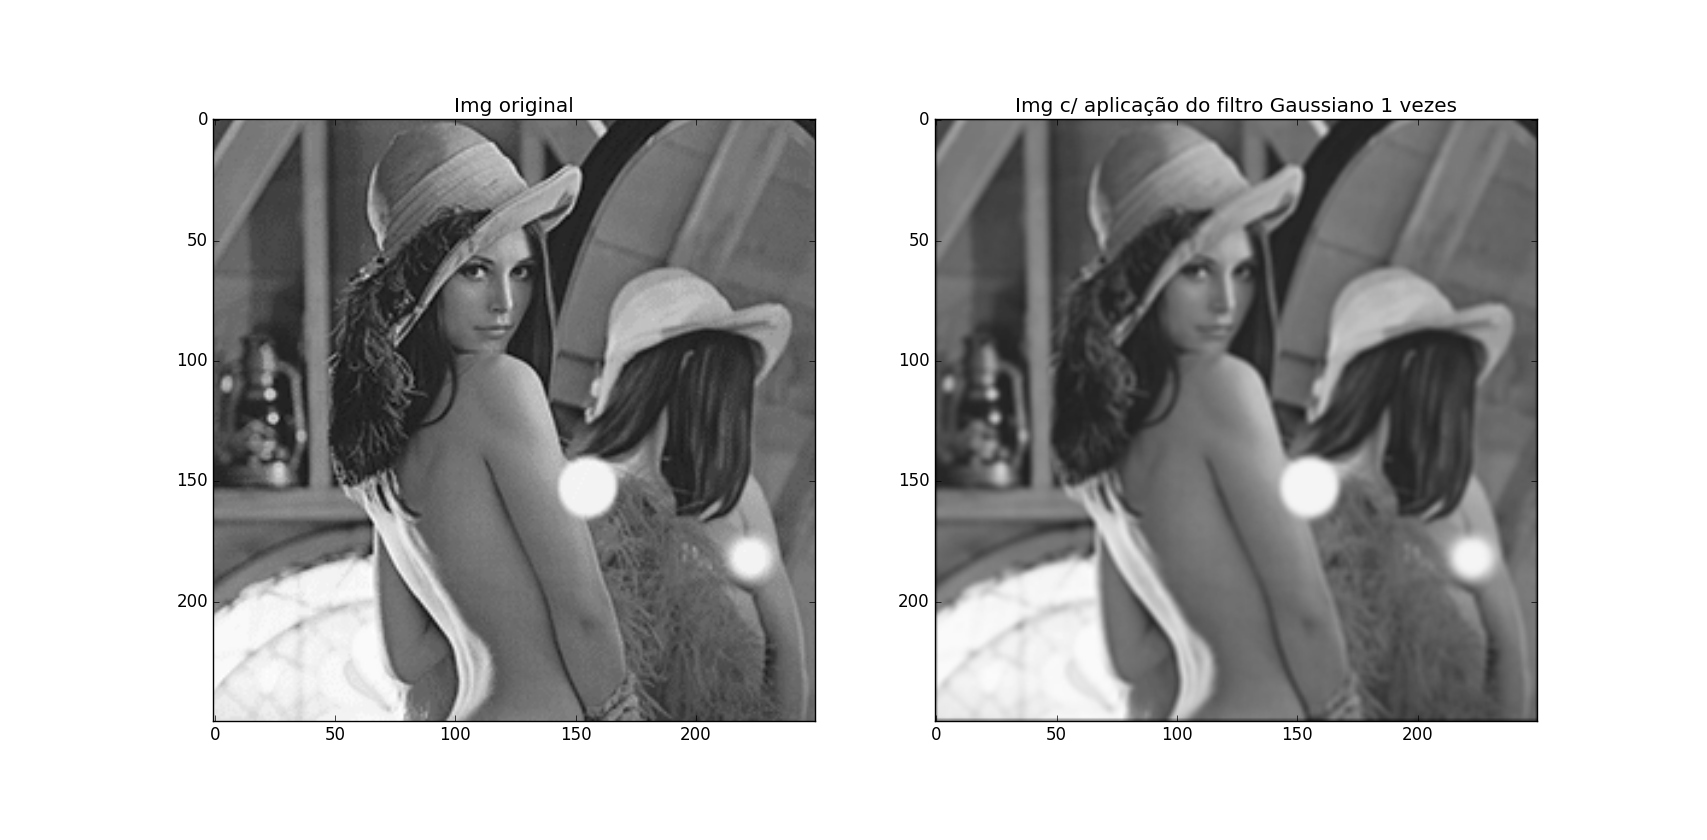

In [21]:
print('Imagem submetida a um filtro Gaussiano de Kernel 5x5 com sigma = 3.0')
Image(filename='lena-sig30.png')

Imagem submetida a um filtro Gaussiano de Kernel 5x5 com sigma = 5.0


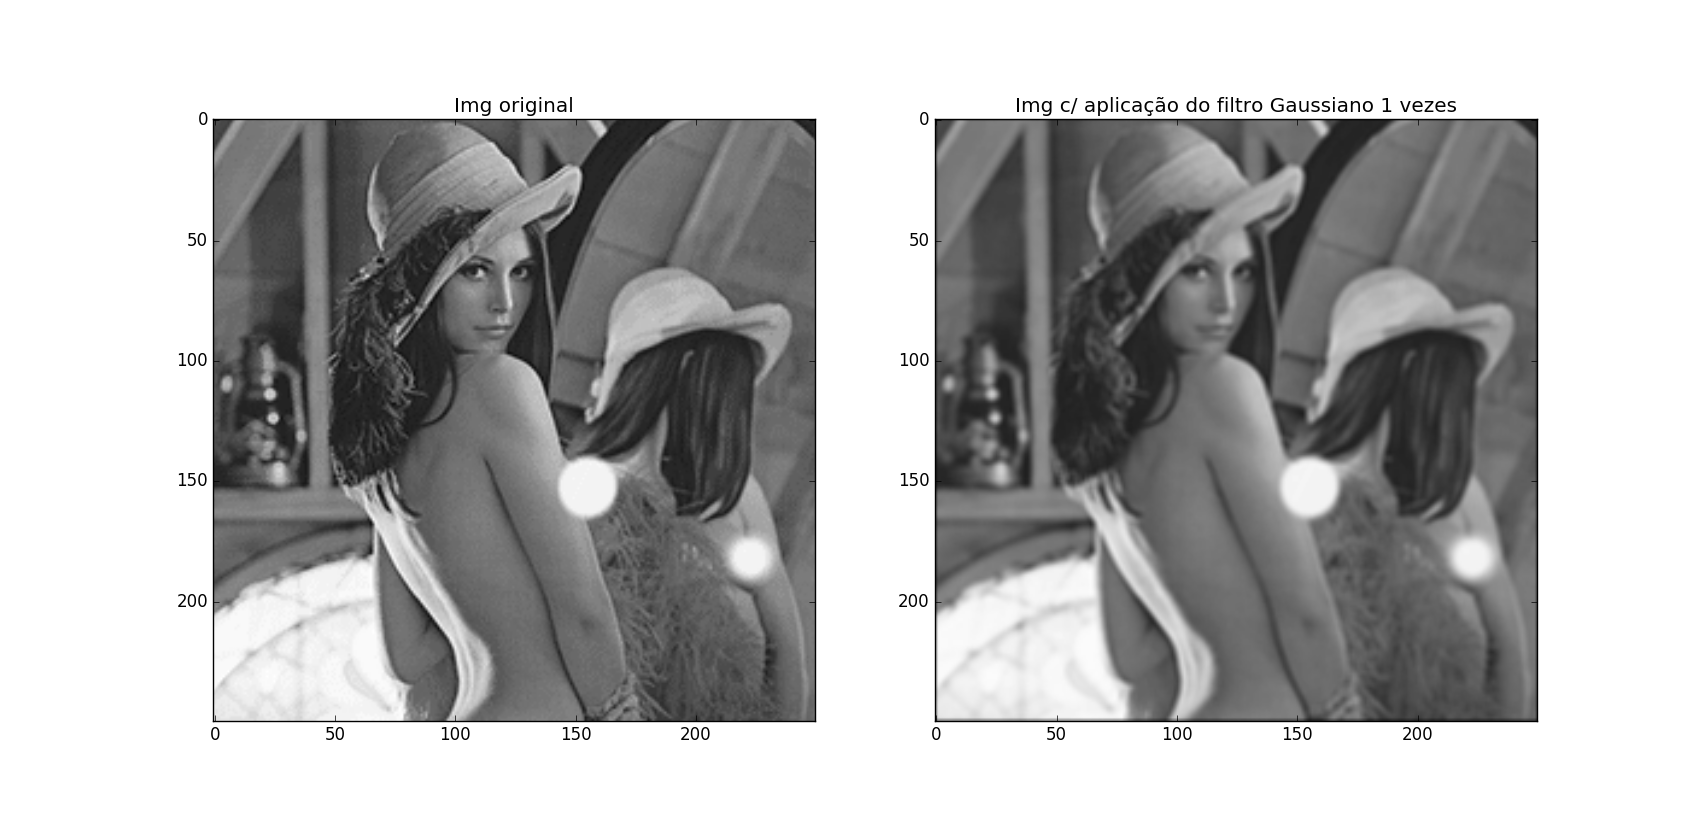

In [22]:
print('Imagem submetida a um filtro Gaussiano de Kernel 5x5 com sigma = 5.0')
Image(filename='lena-sig50.png')

## Conclusões

O Filtro Gaussiano também produz borramentos, como era esperado de um filtro passa-baixa e sua aplicação é semelhante a uma média ponderada com pesos referentes aos valores da Gaussiana. Por tal motivo seu efeito de borramento dar-se do centro para as bordas, enquanto o filtro da média traz o pixel para o valor médio da região o filtro gaussiano pondera de forma maior o pixel central, tendendo a preservar a imagem original.

Constatou-se que o aumento deste parâmetro de "abertura" da curva Gaussiana, o desvio padrão, tender a tornar a operação da Gaussiana semelhar ao filtro da média, visto que a ponderação do centro do kernel para a vizinhança é menor.